In [1]:
# Import necessary libraries and modules
from gammapy.datasets import MapDataset
from gammapy.estimators import FluxPoints
from gammapy.modeling.models import Models
import astropy.units as u
import matplotlib.pyplot as plt

from GPyUtils.models_templates import MyCatalog

from modules.variables import *

In [2]:
# Name of the dataset file to be used for the SED calculation
file_name = 'all_IDs'
e_min = 1
e_max = 200
bin = 20
binsz = 0.02
dataset_name = f"dataset_{file_name}_ene_{e_min}_{e_max}_bin_{bin}_binsz_{binsz}.fits.gz"

# Set the path to the dataset file
path_to_dataset = path_to_datasets / 'width_22x10' / dataset_name

# Reading the MapDataset from the specified file
dataset = MapDataset.read(filename=path_to_dataset)

# Name of the YAML file containing the fitted model to be used for the SED calculation
filename = "00_pl_disk_center_fixed_fitted"
path_to_fit_models = path_to_results / 'no_diffuse' / f"{file_name}_ene_{e_min}_{e_max}_bin_{bin}_binsz_{binsz}" / "models"

# Load the fitted model from the YAML file
models_fit = Models.read(f"{path_to_fit_models}/{filename}.yaml")

# Set the loaded model as the source model in the dataset
dataset.models = models_fit

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [3]:
filename = path_to_fluxdatapoints / filename / "spectrum_cygnus_diffuse.fits"
diffuse_flux_points = FluxPoints.read(filename)

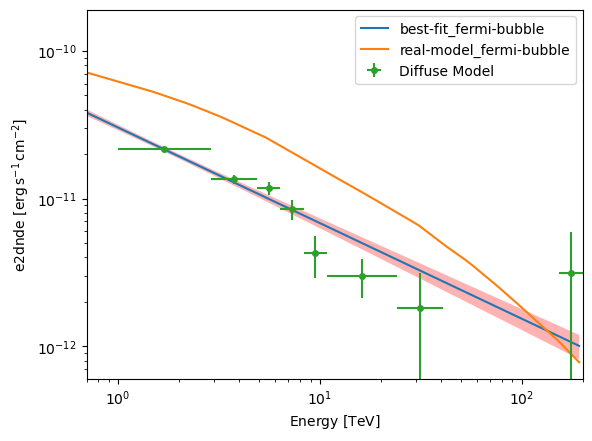

In [7]:
# Template emission for the Fermi Bubble
mycat = MyCatalog()
fermi_template = mycat.fermi_bubble()[0].spectral_model
fitted_diffuse = dataset.models["cygnus_diffuse"].spectral_model

fig, ax = plt.subplots()

plot_kwargs = {
    "energy_bounds": [0.1, 200] * u.TeV,
    "sed_type": "e2dnde",
    "yunits": u.Unit("erg cm-2 s-1"),
    "ax": ax,
}

# plot best fit model
fitted_diffuse.plot(**plot_kwargs, label="best-fit_fermi-bubble")
fitted_diffuse.plot_error(facecolor="red", alpha=0.3, **plot_kwargs)


# plot joint model
ax = fermi_template.plot(**plot_kwargs, label="real-model_fermi-bubble")

#plot flux data points
#diffuse_flux_points.plot(ax=ax, sed_type="e2dnde", label="Real Model")
diffuse_flux_points.plot(ax=ax, sed_type="e2dnde",label="Diffuse Model")

#ax.set_ylim([1.e-14, 5.e-10])
ax.set_xlim([0.7, 200])
ax.legend()
plt.show()